Drive link: https://colab.research.google.com/drive/1jYNsUsdGDqYyfJTpdjgJ3oHJprWYiZeD?usp=sharing

# CS412 - Machine Learning - 2021
## Homework 3
100 pts


## Goal

The goal of this homework is two-fold:

*   Introduction to the Transfer Learning
*   Gain experience with three dimensional input data (colored images), and pretrained models

## Dataset
[**CelebA**](https://www.cs.toronto.edu/~kriz/cifar.html) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter.

**Download the data from Sucourse and upload it to your Google drive. In your Google drive, you need to have CelebA10k.zip and CelebA10kGender.txt uploaded. (Do not change the name of these files.) Reserve 20% of the training data for validation** and **use the rest for development (learning your models). The official test data (2000 samples) should only be used for testing at the end, and not model selection.**

## Task 
Build a classifier with the Keras library function calls and pretrained models to classify gender in the CelebA dataset.

## Software: 

Keras is a library that we will use especially for deep learning, but also with basic neural network functionality of course.

You may find the necessary function references here: 

http://scikit-learn.org/stable/supervised_learning.html

https://keras.io/api/

https://keras.io/api/applications/

When you search for Conv2d for instance, you should find the relevant function and explained parameters, easily.

## Submission: 
Fill this notebook. Write the report section at the end, removing the part in italics. 

You should prepare a separate pdf document as your homework (name hw3-CS412-yourname.pdf) which consists of the report (Part 8) of the notebook for easy viewing -and- include a link to your notebook from within the pdf report (make sure to include the link obtained from the #share link on top right). 

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# import the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
% matplotlib inline

In [ ]:
#This will take around 2 to 4 minutes, depends on the internet
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/CS412_HW3/CelebA10k.zip', 'r') # enter the file path on your drive
zip_ref.extractall()
zip_ref.close()

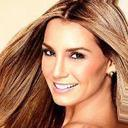

In [ ]:
from IPython.display import Image
Image('000001.jpg')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CS412_HW3/CelebA10klabels.csv") # enter the file path on your drive
print(data.shape)
data.head()

(10000, 2)


,5_o_Clock_Shadow,Male
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
categorical_features = ['Male']
data = pd.get_dummies(data=data, columns=categorical_features)
data = data.rename(columns={'Male_-1': 'Female', 'Male_1': 'Male'})
data.head()

,5_o_Clock_Shadow,Female,Male
0,000001.jpg,0,1
1,000002.jpg,0,1
2,000003.jpg,1,0
3,000004.jpg,1,0
4,000005.jpg,1,0


In [ ]:
### DO NOT CHANGE THE CODE HERE SO AS TO NOT GET ERRORS
# parameters
ImgSz = 64

# Read training images from text file

labels = []
images = []
for j in range(data.shape[0]):
    labels.append([data["Female"][j], data["Male"][j] ])
    #labels.append(data["Male"][j])
    #Reading Image
    im = image.load_img(data["5_o_Clock_Shadow"][j])  
    im = im.resize((ImgSz, ImgSz))
    x = image.img_to_array(im) 
    #x = x.reshape((1,) + x.shape) 
    x = np.array(x, dtype="float") / 255.0
    images.append(x)
    
lbls = np.array(labels)
imgs = np.array(images)

x_train = imgs[0:8000]
y_train = lbls[0:8000]
x_test = imgs[8000:]
y_test = lbls[8000:]

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 64, 64, 3), (8000, 2), (2000, 64, 64, 3), (2000, 2))

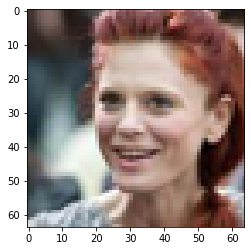

In [ ]:
plt.imshow(x_train[1])


In [ ]:
y_train

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

##3) Visualizing/Understanding the dataset

- Display five random images together with their labels

- Display statistics about the dataset, such as its memory usage, distribution of labels, etc.


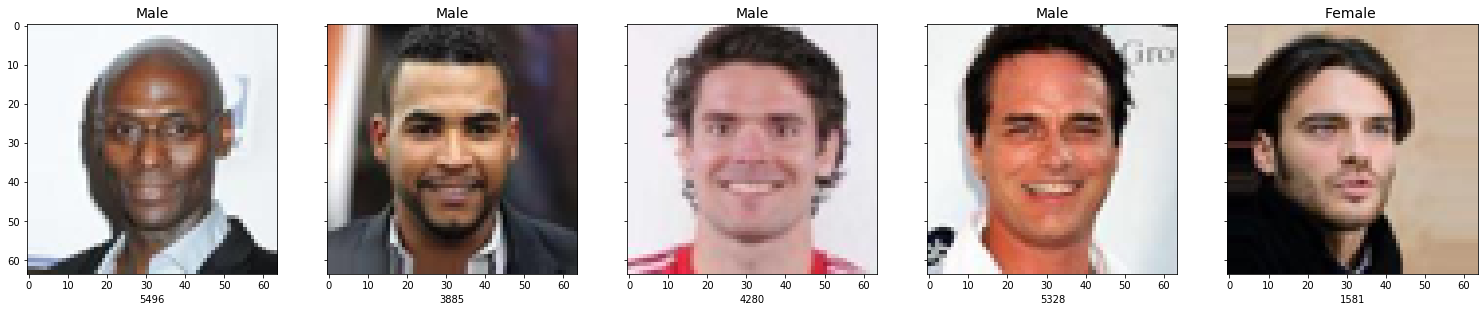

In [ ]:
# plot random 5 images in your dataset with their labels
import random
#plt.imshow(x_train[1])
fig, axes = plt.subplots(1, 5 , sharex= True ,sharey= True, figsize = (26,8))

for i in range(5):
  count = random.randint(0, 8000)
  label = "Female " if y_train[count][0] == 1 else "Male"
  axes[i].imshow(x_train[count])
  axes[i].set_title(label,fontsize = 14)
  axes[i].set_xlabel(count)

plt.show()


Text(0.5, 1.0, '1')

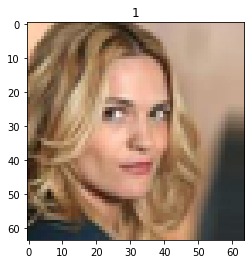

In [ ]:
plt.imshow(x_train[4306])
plt.title(y_train[4306][0])

In [ ]:
print("Memory size of x_train:", x_train.nbytes)
print("Memory size of y_train:", y_train.nbytes)
print("Memory size of x_test:", x_test.nbytes)
print("Memory size of y_test:", y_test.nbytes)
print("Total used memory for train and test:",x_train.nbytes + y_train.nbytes + x_test.nbytes + y_test.nbytes)

Memory size of x_train: 786432000
Memory size of y_train: 16000
Memory size of x_test: 196608000
Memory size of y_test: 4000
Total used memory for train and test: 983060000


In [ ]:
maleCount = 0
femaleCount = 0
for i in range(8000):
  if y_train[i][0] == 1:
    femaleCount = femaleCount + 1 
maleCount = 8000 - femaleCount
print("Female number for train:", maleCount)
print("Male number for train:", femaleCount)
maleCount = 0
femaleCount = 0
for i in range(2000):
  if y_test[i][0] == 1:
    femaleCount = femaleCount + 1 
maleCount = 2000 - femaleCount
print("Female number for test:", maleCount)
print("Male number for test:", femaleCount)

Female number for train: 3570
Male number for train: 4430
Female number for test: 953
Male number for test: 1047


##4) Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
# Split 80-20
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)
print(Xtrain.shape, Xval.shape, Ytrain.shape, Yval.shape)

(6400, 64, 64, 3) (1600, 64, 64, 3) (6400, 2) (1600, 2)


## 5) Train Model with Transfer Learning
* Import a pretrained model from keras. By freezing some of its layer weights and/or adding more layers to its output train the model on the dataset. Metaparameters of the model are to be set to default or your own choice. 

* Train two more models by adding at most 5 hidden layers into a pretrained model of your choice. Choose the best model among all the models you trained so far by reporting their performance, together with their runtimes, number parameters, etc.



In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dropout, Input, Flatten, Dense
from keras.models import Model, load_model



In [ ]:
# Train your own model with your own choice of parameters, and pretrained model 

# ...
# Report your results

# ...

##Resnet50

In [ ]:
fourth_model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(ImgSz,ImgSz,3))
fourth_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                          

In [ ]:
for layer in fourth_model.layers:
   layer.trainable = False
    
fourth_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
img_shape = Xtrain.shape[1:]
num_classes = 2
print(img_shape)

#Create your own input format
keras_input = Input(shape=img_shape, name = 'image_input')

#Use the generated model
output_vgg_conv = fourth_model(keras_input)

# Add 3 fully-connected layers 
My_vgg = Flatten(name='flatten')(output_vgg_conv)
My_vgg = Dense(512, activation='relu', name='fc1')(My_vgg)
My_vgg = Dense(128, activation='relu', name='fc2')(My_vgg)
My_vgg = Dense(64, activation='relu', name='fc3')(My_vgg)
My_vgg = Dense(num_classes, activation='softmax', name='predictions')(My_vgg)

#Create your own model 

pretrained_model4 = Model(inputs=keras_input, outputs= My_vgg)
pretrained_model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

pretrained_model4.summary()

(64, 64, 3)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 fc1 (Dense)                 (None, 512)               4194816   
                                                                 
 fc2 (Dense)                 (None, 128)               65664     
                                                                 
 fc3 (Dense)                 (None, 64)                8256      
                                                                 
 predictions (Dense)         (None, 2)           

In [ ]:
# Train the model using own data
history4 = pretrained_model4.fit(Xtrain, Ytrain, batch_size=64, epochs=10, validation_split = 0.2) #, validation_data = (Xval, Yval)

# Evaluate the model
score4 = pretrained_model4.evaluate(Xval, Yval)
print("Accuracy on validation set: ", score4[1])

Epoch 1/10
80/80 [==============================] - 6s 78ms/step - loss: 0.6447 - accuracy: 0.6215 - val_loss: 0.6623 - val_accuracy: 0.6023
Epoch 2/10
80/80 [==============================] - 6s 77ms/step - loss: 0.6389 - accuracy: 0.6318 - val_loss: 0.7163 - val_accuracy: 0.5719
Epoch 3/10
80/80 [==============================] - 6s 77ms/step - loss: 0.6448 - accuracy: 0.6205 - val_loss: 0.6520 - val_accuracy: 0.6156
Epoch 4/10
80/80 [==============================] - 6s 79ms/step - loss: 0.6360 - accuracy: 0.6332 - val_loss: 0.6731 - val_accuracy: 0.5688
Epoch 5/10
80/80 [==============================] - 6s 78ms/step - loss: 0.6339 - accuracy: 0.6402 - val_loss: 0.6479 - val_accuracy: 0.6219
Epoch 6/10
80/80 [==============================] - 6s 78ms/step - loss: 0.6178 - accuracy: 0.6639 - val_loss: 0.6413 - val_accuracy: 0.6406
Epoch 7/10
80/80 [==============================] - 6s 76ms/step - loss: 0.6091 - accuracy: 0.6736 - val_loss: 0.6456 - val_accuracy: 0.6430
Epoch 8/10
80

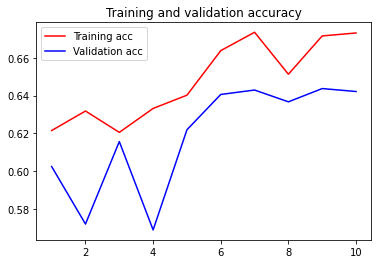

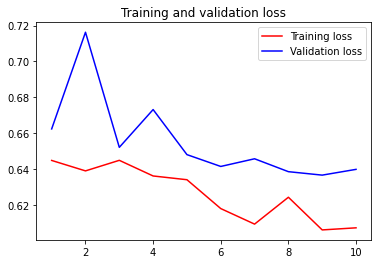

In [ ]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

##VGG16 Model 1

In [ ]:
first_model = VGG16(weights = "imagenet",  include_top=False, input_shape=(ImgSz,ImgSz,3))
first_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
for layer in first_model.layers:
   layer.trainable = False
    
first_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
img_shape = Xtrain.shape[1:]
num_classes = 2
print(img_shape)

#Create your own input format
keras_input = Input(shape=img_shape, name = 'image_input')

#Use the generated model
output_vgg_conv = first_model(keras_input)

# Add 3 fully-connected layers 
My_vgg = Flatten(name='flatten')(output_vgg_conv)
My_vgg = Dense(512, activation='relu', name='fc1')(My_vgg)
My_vgg = Dense(128, activation='relu', name='fc2')(My_vgg)
My_vgg = Dense(64, activation='relu', name='fc3')(My_vgg)
My_vgg = Dense(num_classes, activation='softmax', name='predictions')(My_vgg)

#Create your own model 
pretrained_model = Model(inputs=keras_input, outputs= My_vgg)
pretrained_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

pretrained_model.summary()



(64, 64, 3)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 fc1 (Dense)                 (None, 512)               1049088   
                                                                 
 fc2 (Dense)                 (None, 128)               65664     
                                                                 
 fc3 (Dense)                 (None, 64)                8256      
                                                                 
 predictions (Dense)         (None, 2)         

In [ ]:
# Train the model using own data
history = pretrained_model.fit(Xtrain, Ytrain, batch_size=64, epochs=10,validation_split = 0.2 ) #, validation_data = (Xval, Yval)

# Evaluate the model
score = pretrained_model.evaluate(Xval, Yval)
print("Accuracy on validation set: ", score[1])

Epoch 1/10
80/80 [==============================] - 5s 67ms/step - loss: 0.0672 - accuracy: 0.9758 - val_loss: 0.1006 - val_accuracy: 0.9563
Epoch 2/10
80/80 [==============================] - 5s 65ms/step - loss: 0.0529 - accuracy: 0.9799 - val_loss: 0.1553 - val_accuracy: 0.9477
Epoch 3/10
80/80 [==============================] - 5s 69ms/step - loss: 0.0472 - accuracy: 0.9830 - val_loss: 0.1365 - val_accuracy: 0.9492
Epoch 4/10
80/80 [==============================] - 5s 64ms/step - loss: 0.0507 - accuracy: 0.9803 - val_loss: 0.1922 - val_accuracy: 0.9398
Epoch 5/10
80/80 [==============================] - 5s 68ms/step - loss: 0.0543 - accuracy: 0.9809 - val_loss: 0.3348 - val_accuracy: 0.8844
Epoch 6/10
80/80 [==============================] - 5s 64ms/step - loss: 0.0503 - accuracy: 0.9822 - val_loss: 0.1876 - val_accuracy: 0.9273
Epoch 7/10
80/80 [==============================] - 5s 68ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.2650 - val_accuracy: 0.9172
Epoch 8/10
80

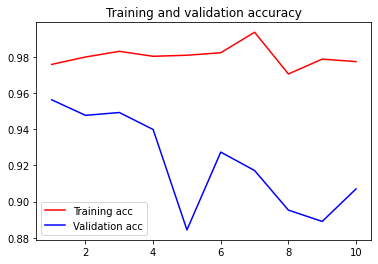

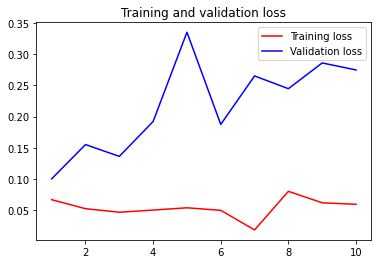

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

## VGG16 Model 2

In [ ]:
imag_shape = Xtrain.shape[1:]
num_classes = 2
print(imag_shape)

#Create your own input format
keras_input = Input(shape=imag_shape, name = 'image_input')

#Use the generated model
output_vgg_conv2 = first_model(keras_input)

# Add 3 fully-connected layers 
My_vgg2 = Flatten(name='flatten')(output_vgg_conv2)
My_vgg2= Dense(256, activation='relu', name='fc1')(My_vgg2)
My_vgg2 = Dense(256, activation='relu', name='fc2')(My_vgg2)
My_vgg2 = Dense(64, activation='relu', name='fc3')(My_vgg2)
My_vgg2 = Dense(num_classes, activation='softmax', name='predictions')(My_vgg2)

#Create your own model 
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
pretrained_model2 = Model(inputs=keras_input, outputs= My_vgg2)

pretrained_model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

pretrained_model2.summary()

(64, 64, 3)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 fc1 (Dense)                 (None, 256)               524544    
                                                                 
 fc2 (Dense)                 (None, 256)               65792     
                                                                 
 fc3 (Dense)                 (None, 64)                16448     
                                                                 
 predictions (Dense)         (None, 2)         

In [ ]:
# Train the model using own data
history2 = pretrained_model2.fit(Xtrain, Ytrain, batch_size=64, epochs=10, validation_split = 0.2) #, validation_data = (Xval, Yval)

# Evaluate the model
score2 = pretrained_model2.evaluate(Xval, Yval)
print("Accuracy on validation set: ", score2[1])

Epoch 1/10
80/80 [==============================] - 6s 68ms/step - loss: 0.6448 - accuracy: 0.6330 - val_loss: 0.6320 - val_accuracy: 0.6305
Epoch 2/10
80/80 [==============================] - 5s 64ms/step - loss: 0.5969 - accuracy: 0.6828 - val_loss: 0.6085 - val_accuracy: 0.6719
Epoch 3/10
80/80 [==============================] - 5s 64ms/step - loss: 0.5715 - accuracy: 0.7027 - val_loss: 0.6039 - val_accuracy: 0.6719
Epoch 4/10
80/80 [==============================] - 5s 64ms/step - loss: 0.5427 - accuracy: 0.7250 - val_loss: 0.6106 - val_accuracy: 0.6820
Epoch 5/10
80/80 [==============================] - 5s 68ms/step - loss: 0.5218 - accuracy: 0.7402 - val_loss: 0.6034 - val_accuracy: 0.6844
Epoch 6/10
80/80 [==============================] - 5s 68ms/step - loss: 0.4944 - accuracy: 0.7611 - val_loss: 0.5923 - val_accuracy: 0.6891
Epoch 7/10
80/80 [==============================] - 5s 64ms/step - loss: 0.4662 - accuracy: 0.7838 - val_loss: 0.5988 - val_accuracy: 0.6812
Epoch 8/10
80

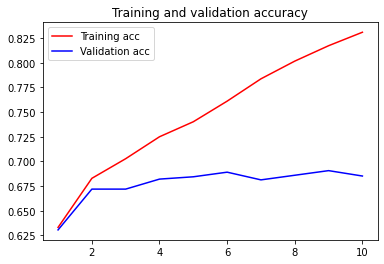

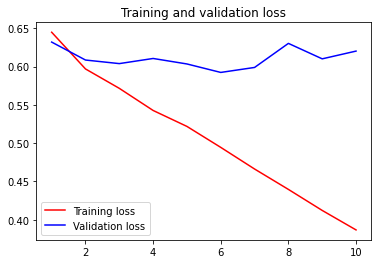

In [ ]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

## VGG19

In [ ]:
third_model = VGG19(weights = "imagenet",  include_top=False, input_shape=(ImgSz,ImgSz,3))
third_model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
for layer in third_model.layers[:-2]:
   layer.trainable = False
    
third_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
imag_shape = Xtrain.shape[1:]
num_classes = 2
print(imag_shape)

#Create your own input format
keras_input = Input(shape=imag_shape, name = 'image_input')

#Use the generated model
output_vgg_conv3 = third_model(keras_input)

# Add 3 fully-connected layers 
My_vgg3 = Flatten(name='flatten')(output_vgg_conv3)
My_vgg3 = Dense(512, activation='relu', name='fc1')(My_vgg3)
My_vgg3 = Dense(128, activation='relu', name='fc2')(My_vgg3)
My_vgg3 = Dense(64, activation='relu', name='fc3')(My_vgg3)
My_vgg3 = Dense(num_classes, activation='softmax', name='predictions')(My_vgg3)

#Create your own model 
pretrained_model3 = Model(inputs=keras_input, outputs= My_vgg3)
pretrained_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

pretrained_model3.summary()

(64, 64, 3)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 64, 3)]       0         
                                                                 
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 fc1 (Dense)                 (None, 512)               1049088   
                                                                 
 fc2 (Dense)                 (None, 128)               65664     
                                                                 
 fc3 (Dense)                 (None, 64)                8256      
                                                                 
 predictions (Dense)         (None, 2)         

In [ ]:
history3 = pretrained_model3.fit(Xtrain, Ytrain, batch_size=64, epochs=10, validation_split= 0.2) #, validation_data = (Xval, Yval)

# Evaluate the model
score3 = pretrained_model3.evaluate(Xval, Yval)
print("Accuracy on validation set: ", score3[1])

Epoch 1/10
80/80 [==============================] - 7s 85ms/step - loss: 0.0463 - accuracy: 0.9838 - val_loss: 0.0589 - val_accuracy: 0.9820
Epoch 2/10
80/80 [==============================] - 7s 84ms/step - loss: 0.0413 - accuracy: 0.9848 - val_loss: 0.0892 - val_accuracy: 0.9664
Epoch 3/10
80/80 [==============================] - 7s 84ms/step - loss: 0.0395 - accuracy: 0.9857 - val_loss: 0.0472 - val_accuracy: 0.9836
Epoch 4/10
80/80 [==============================] - 7s 84ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0803 - val_accuracy: 0.9734
Epoch 5/10
80/80 [==============================] - 7s 84ms/step - loss: 0.0644 - accuracy: 0.9732 - val_loss: 0.0932 - val_accuracy: 0.9633
Epoch 6/10
80/80 [==============================] - 7s 83ms/step - loss: 0.0337 - accuracy: 0.9869 - val_loss: 0.0789 - val_accuracy: 0.9688
Epoch 7/10
80/80 [==============================] - 7s 84ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.2141 - val_accuracy: 0.9359
Epoch 8/10
80

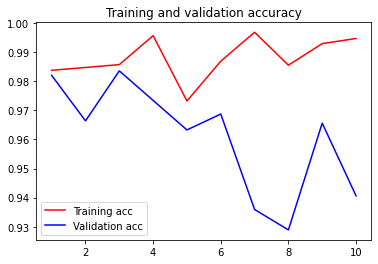

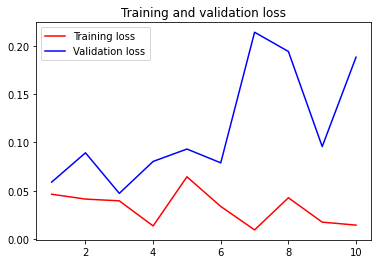

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

## 6) Test your classifier on Test set

- Apply same pre-processing as training data
- Predict the labels of testing data **using the best model that you have selected according to your validation results** and report the accuracy. 

In [ ]:
from sklearn.metrics import accuracy_score
# Load test data


historytest = pretrained_model3.fit(Xtrain, Ytrain, batch_size=64, epochs=10, validation_data = (Xval, Yval))

# Evaluate the model
score = pretrained_model3.evaluate(x_test, y_test)
print("Accuracy on test set: ", score[1])


Epoch 1/10
100/100 [==============================] - 10s 96ms/step - loss: 0.0619 - accuracy: 0.9773 - val_loss: 0.9890 - val_accuracy: 0.7700
Epoch 2/10
100/100 [==============================] - 8s 83ms/step - loss: 0.0394 - accuracy: 0.9861 - val_loss: 0.9247 - val_accuracy: 0.7719
Epoch 3/10
100/100 [==============================] - 8s 84ms/step - loss: 0.0456 - accuracy: 0.9837 - val_loss: 0.8755 - val_accuracy: 0.7856
Epoch 4/10
100/100 [==============================] - 9s 95ms/step - loss: 0.0197 - accuracy: 0.9931 - val_loss: 1.2467 - val_accuracy: 0.7638
Epoch 5/10
100/100 [==============================] - 9s 95ms/step - loss: 0.0248 - accuracy: 0.9906 - val_loss: 1.1458 - val_accuracy: 0.7775
Epoch 6/10
100/100 [==============================] - 9s 94ms/step - loss: 0.0210 - accuracy: 0.9920 - val_loss: 1.0976 - val_accuracy: 0.7856
Epoch 7/10
100/100 [==============================] - 8s 83ms/step - loss: 0.0451 - accuracy: 0.9837 - val_loss: 1.0479 - val_accuracy: 0.765

In [ ]:
# Predict
Finalresults = pd.DataFrame(pretrained_model3.predict(x_test))
Finalresults.head(10)
# Report your result

,0,1
0,9.999988e-01,1.147096e-06
1,4.874997e-01,5.125002e-01
2,4.295146e-02,9.570485e-01
3,1.000000e+00,1.097194e-08
4,9.999729e-01,2.702891e-05
5,1.821383e-05,9.999818e-01
6,2.353512e-01,7.646488e-01
7,2.362509e-07,9.999998e-01
8,2.198835e-07,9.999998e-01
9,2.850288e-02,9.714972e-01


In [ ]:
for i in range(2000):
  if Finalresults[0][i] > 0.5:
    Finalresults[0][i] = 1
    Finalresults[1][i] = 0 
  else:
    Finalresults[0][i] = 0
    Finalresults[1][i] = 1

Finalresults.head(10) 

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


In [ ]:
accuracy_score(y_test, Finalresults) 

0.6755

##7) Report Your Results

**Notebook should be RUN:** As training and testing may take a long time, we may just look at your notebook results; so make sure **each cell is run**, so outputs are there.

**Report:** Write an **one page summary** of your approach to this problem **below**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what CNN is or what transfer learning is, assuming they are known to people in your research area). 

**Must include statements such as those below:**
**(Remove the text in bullet points, below, and include your own report)**

* Include the **problem definition**: Our problem is to build a classifier in which we are going to predict gender of the each person on the image dataset by using Transfer learning approach where we are going to manipulate a pre-trained network such as but not limited to VGG16, VGG19 and ResNet50. In addition, we can implement a CNN to predict genders in the bonus part.

* Talk about your **approach**: After studying the recitation notes, I researched about pre-trained networks that I can use that are provided by Keras. Thus, after some evaluation and looking some examples on Kaggle, I decided to use ResNet50, VGG16 and VGG19. Mostly, I freeze all the layers except VGG19. To clarify, I am turning the trainable parameters on each layer to non-trainable. In VGG19, I decided to keep one layer to be trainable. Then, I generated new models in which pre-trained models are included. I added some dense layers and a final layer in which we have 2 output neurons. I use softmax function at the output layer. In other layers that I have manually added, I used Relu activation function. I decided to use 10 epoch for my evaluation process. In each model that I am training the epoch amount is going to be same. I used Adam as my optimizer and for the loss function I used categorical crossentropy.

* Give your **experimental setup**: Our dataset includes 10000 entries in total. In the beginning it is splitted into 80%-20% for train and test dataset. Then, since it was asked, I splitted the train set again with 80%-20% for train and validation sets by using train_test_split function at this step. After that train dataset included 6400 entries while validation dataset included 1600 entries. After that, I created my models which are going to be evaluated by using validation dataset to decide which one is going to be used for test dataset. I used the batch_size as 64 and epoch size as 10. The followings are the evaluation accuracy results of the models. If you want to see the graphs for observing the changes on accuracy and loss. You can check the graphs for each model above

  **Observations**

**Neural Networks by Transfer Learning using Pre-Trained Networks**

**Optimizer = Adam, Batch Size = 64, Epoch = 10**
>Model Description | Accuracy results on Validation Set |
>---|:---|
>Model 1 with VGG16|0.671|
>Model 2 with VGG16|0.679|
>Model 3 with VGG19|**0.772**|
>Model 4 with ResNet50|0.663|

After receiving these scores, I decided to use the third model where I used the pre-trained network **VGG19**. I trained my model with train dataset where I used Xval and Yval as validation data and evaluated with the test dataset. I received the test accuracy as 0.675.

* **Anything else?**: If you forget to the change workspace area to GPU it takes a lot of time to run the models. When you increase the epoch number, time for running the model increases. When I check the memory usage of the train and test dataset by using nbyte function, I think that the memory space that we use to store data was not a huge deal. The think that was interesting was when I play with the layer sizes or weights of the pre-trained network by freezing, I was able to notice the impact of smalle changes to the accuracy results. It was fascinating. 

* You can add **additional visualization as separate pages **: I did not add an extra page. However, you can check some visualizations for train and validation in the above.

* Mention **Bonus part** here: In the bonus part, I tried to implement a Convolutional Neural Network(CNN). After checking the usage Conv2D from Keras. I decided to use 4 Convolutional layers with max-pooling layer where their size is 2 by 2. For layers with dimensionality of 64(for dimensionality the parameter is filters) I decided to use the kernel size as 3 where it specifies the height and width of the filter. For layers with dimensionality of 128, I decided to use the kernel size as 5. By having different kernel size I want to see the effects of it in which kernel size affects a lot traditional computer vision results in general such as but not limited to image smoothing, edge detection and corner detection.

Then, I added some fully connected layers of neuron size 128, 64, 32 and output layer 2. After training the model with training set where validation data was specified as (Xval, Yval). I evaluated the test set with the model. The accuracy score we received is **0.83**. The score is higher than the others. I believe from the scratch we came up with a good CNN model. After using pre-trained networks and this bonus part I noticed that using CNN is an essential when we deal with images.
 



##8) (Bonus 5 pts) Train Convolutional neural networks first on development data


* Train a convolutional neural network from scratch (not transfer learning) with number of hidden layers and neurons of **your choice**. Rest of the parameters are to be set to default or your own choice. 

* The aim of this part is to establish an insight for convolutional neural networks and to see why we use them.


In [ ]:
# Train CNNs
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
model = tf.keras.Sequential()
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',strides = 2, input_shape=(64, 64 ,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides = 1,padding='same'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=5, strides = 2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='same'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=5, strides = 2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='same'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',strides = 2,input_shape=(64, 64 ,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides = 1,padding='same'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation='softmax'))
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
# Report your results    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 31, 31, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 128)         409728    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)       

In [ ]:
bonus = model.fit(Xtrain, Ytrain, batch_size=64, epochs=10, validation_data = (Xval, Yval)) #, 

# Evaluate the model
bonus_score = model.evaluate(x_test, y_test)
print("Accuracy on test set: ", bonus_score[1])

Epoch 1/10
100/100 [==============================] - 4s 34ms/step - loss: 0.6832 - accuracy: 0.5608 - val_loss: 0.7158 - val_accuracy: 0.5281
Epoch 2/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6562 - accuracy: 0.6056 - val_loss: 0.6219 - val_accuracy: 0.6525
Epoch 3/10
100/100 [==============================] - 3s 31ms/step - loss: 0.5663 - accuracy: 0.7164 - val_loss: 0.4910 - val_accuracy: 0.7669
Epoch 4/10
100/100 [==============================] - 3s 31ms/step - loss: 0.4616 - accuracy: 0.7909 - val_loss: 0.4071 - val_accuracy: 0.8119
Epoch 5/10
100/100 [==============================] - 3s 31ms/step - loss: 0.3983 - accuracy: 0.8292 - val_loss: 0.4423 - val_accuracy: 0.8056
Epoch 6/10
100/100 [==============================] - 3s 31ms/step - loss: 0.3643 - accuracy: 0.8433 - val_loss: 0.3585 - val_accuracy: 0.8394
Epoch 7/10
100/100 [==============================] - 3s 31ms/step - loss: 0.3207 - accuracy: 0.8653 - val_loss: 0.3697 - val_accuracy: 0.8406

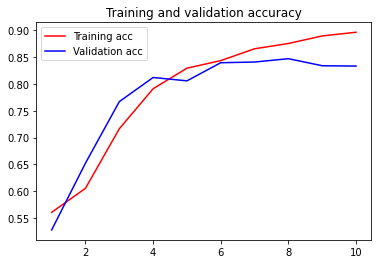

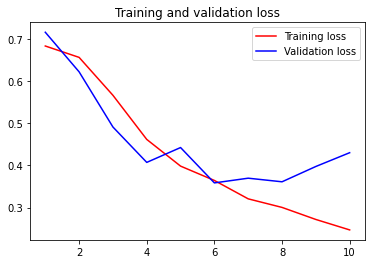

In [ ]:
acc = bonus.history['accuracy']
val_acc = bonus.history['val_accuracy']
loss = bonus.history['loss']
val_loss = bonus.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
# ### example loading a pretrained model
# #Loading the model
# VGGmodel = tf.keras.applications.VGG16(include_top = False, weights = "imagenet", input_shape = (ImgSz,ImgSz,3)) # pretrained weigths on imagenet dataset
# VGGmodel.summary() # Print the network

# # Remove last two layers (one hidden layer + Output layer)
# VGGmodel.layers.pop()
# VGGmodel.layers.pop()

# # Freeze the layers except the last 2 layers
# for layer in VGGmodel.layers[:-2]:
#     layer.trainable = False
  
# # Check the status of the layers 
# for layer in VGGmodel.layers:
#     print(layer, layer.trainable)

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
# # Create the model
# from keras.layers import Dense, Dropout, Flatten
# model = tf.keras.Sequential() # your model that will use the pretrained model's parameters
 
# # Add the vgg convolutional base model
# model.add(VGGmodel)
 
# # Add new layers
# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
 
# # Show a summary of the model. Check the number of trainable parameters
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 4096)              2101248   
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4097      
                                                                 
Total params: 16,820,033
Trainable params: 4,465,153
Non-trainable params: 12,354,880
_________________________________________________________________
